# Default Payment System
to check if a customer will pay her bills next month


This is a practice project. I peformed some ml learing tecniques with the knowledge I have gained over the three chapters of ML Zoomcamp. Everything here is my opinion and I am very open to corrections.

In [9]:
# import necessary libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from collections import Counter

In [10]:
# !pip install xlrd -- install this library if not on machine! then you can comment it out again
df = pd.read_excel('default_of_credit_card_clients.xls', header=1)

In [11]:
# viewing the head
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


In [12]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [13]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
default_payment_next_month_values = {
    0: 'ok',
    1: 'default'
}
df.default_payment_next_month = df.default_payment_next_month.map(default_payment_next_month_values)

sex_values = {
    1: 'female',
    2: 'male',
    0: 'unk'
}

df.sex = df.sex.map(sex_values)


education_values = {
    1: 'graduate_school',
    2: 'university',
    3: 'secondary',
    4: 'primary',
    5: 'vocational',
    6: 'others',
    0: 'unk'
}

df.education = df.education.map(education_values)

marital_values = {
    1: 'married',
    2: 'single',
    3: 'others',
    0: 'unk'
}

df.marriage = df.marriage.map(marital_values)

pay_0_values = {
    -2: 'one_month_early',
    -1: 'duly',
    1: 'one_month_late',
    2: 'two_month_late',
    3: 'three_month_late',
    4: 'four_month_late',
    5: 'five_month_late',
    6: 'six_month_late',
    7: 'seven_month_late',
    0: 'unk'
}

df.pay_0 = df.pay_0.map(pay_0_values)

pay_2_values = {
    -2: 'one_month_early',
    -1: 'duly',
    1: 'one_month_late',
    2: 'two_month_late',
    3: 'three_month_late',
    4: 'four_month_late',
    5: 'five_month_late',
    6: 'six_month_late',
    7: 'seven_month_late',
    0: 'unk'
}
df.pay_2 = df.pay_2.map(pay_2_values)

pay_3_values = {
    -2: 'one_month_early',
    -1: 'duly',
    1: 'one_month_late',
    2: 'two_month_late',
    3: 'three_month_late',
    4: 'four_month_late',
    5: 'five_month_late',
    6: 'six_month_late',
    7: 'seven_month_late',
    0: 'unk'
}
df.pay_3 = df.pay_3.map(pay_3_values)

pay_4_values = {
    -2: 'one_month_early',
    -1: 'duly',
    1: 'one_month_late',
    2: 'two_month_late',
    3: 'three_month_late',
    4: 'four_month_late',
    5: 'five_month_late',
    6: 'six_month_late',
    7: 'seven_month_late',
    0: 'unk'
}
df.pay_4 = df.pay_4.map(pay_4_values)

pay_5_values = {
    -2: 'one_month_early',
    -1: 'duly',
    1: 'one_month_late',
    2: 'two_month_late',
    3: 'three_month_late',
    4: 'four_month_late',
    5: 'five_month_late',
    6: 'six_month_late',
    7: 'seven_month_late',
    0: 'unk'
}
df.pay_5 = df.pay_5.map(pay_5_values)

pay_6_values = {
    -2: 'one_month_early',
    -1: 'duly',
    1: 'one_month_late',
    2: 'two_month_late',
    3: 'three_month_late',
    4: 'four_month_late',
    5: 'five_month_late',
    6: 'six_month_late',
    7: 'seven_month_late',
    0: 'unk'
}
df.pay_6 = df.pay_6.map(pay_6_values)


In [15]:
df = df[df.default_payment_next_month != 'unk'].reset_index(drop=True)

In [16]:
df.head(2)

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000,male,university,married,24,two_month_late,two_month_late,duly,duly,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,male,university,single,26,duly,two_month_late,unk,unk,...,3272,3455,3261,0,1000,1000,1000,0,2000,default


In [17]:
df['default'] = (df.default_payment_next_month == 'default').astype(int)
del df['default_payment_next_month']
del df['id']
df.head(2)

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000,male,university,married,24,two_month_late,two_month_late,duly,duly,one_month_early,...,0,0,0,0,689,0,0,0,0,1
1,120000,male,university,single,26,duly,two_month_late,unk,unk,unk,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [18]:
df = df[df.default != 'unk'].reset_index(drop=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   limit_bal  30000 non-null  int64 
 1   sex        30000 non-null  object
 2   education  30000 non-null  object
 3   marriage   30000 non-null  object
 4   age        30000 non-null  int64 
 5   pay_0      29981 non-null  object
 6   pay_2      29999 non-null  object
 7   pay_3      29997 non-null  object
 8   pay_4      29998 non-null  object
 9   pay_5      29999 non-null  object
 10  pay_6      29998 non-null  object
 11  bill_amt1  30000 non-null  int64 
 12  bill_amt2  30000 non-null  int64 
 13  bill_amt3  30000 non-null  int64 
 14  bill_amt4  30000 non-null  int64 
 15  bill_amt5  30000 non-null  int64 
 16  bill_amt6  30000 non-null  int64 
 17  pay_amt1   30000 non-null  int64 
 18  pay_amt2   30000 non-null  int64 
 19  pay_amt3   30000 non-null  int64 
 20  pay_amt4   30000 non-null  i

In [20]:
categorical = ['sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
numerical = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
             'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

In [21]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:7]) # looks for all unique values
    print(df[col].nunique())
    print()

limit_bal
[ 20000 120000  90000  50000 500000 100000 140000]
81

sex
['male' 'female']
2

education
['university' 'graduate_school' 'secondary' 'vocational' 'primary'
 'others' 'unk']
7

marriage
['married' 'single' 'others' 'unk']
4

age
[24 26 34 37 57 29 23]
56

pay_0
['two_month_late' 'duly' 'unk' 'one_month_early' 'one_month_late'
 'three_month_late' 'four_month_late']
10

pay_2
['two_month_late' 'unk' 'duly' 'one_month_early' 'three_month_late'
 'five_month_late' 'seven_month_late']
10

pay_3
['duly' 'unk' 'two_month_late' 'one_month_early' 'three_month_late'
 'four_month_late' 'six_month_late']
10

pay_4
['duly' 'unk' 'one_month_early' 'two_month_late' 'three_month_late'
 'four_month_late' 'five_month_late']
10

pay_5
['one_month_early' 'unk' 'duly' 'two_month_late' 'three_month_late'
 'five_month_late' 'four_month_late']
9

pay_6
['one_month_early' 'two_month_late' 'unk' 'duly' 'three_month_late'
 'six_month_late' 'four_month_late']
9

bill_amt1
[  3913   2682  29239  46990   8

In [22]:
df.isnull().sum()

limit_bal     0
sex           0
education     0
marriage      0
age           0
pay_0        19
pay_2         1
pay_3         3
pay_4         2
pay_5         1
pay_6         2
bill_amt1     0
bill_amt2     0
bill_amt3     0
bill_amt4     0
bill_amt5     0
bill_amt6     0
pay_amt1      0
pay_amt2      0
pay_amt3      0
pay_amt4      0
pay_amt5      0
pay_amt6      0
default       0
dtype: int64

In [23]:
df = df.fillna(0)

In [24]:
df.isnull().sum()

limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_0        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
default      0
dtype: int64

In [25]:
df.shape # sanity check

(30000, 24)

In [26]:
df.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000,male,university,married,24,two_month_late,two_month_late,duly,duly,one_month_early,...,0,0,0,0,689,0,0,0,0,1
1,120000,male,university,single,26,duly,two_month_late,unk,unk,unk,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,male,university,single,34,unk,unk,unk,unk,unk,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,male,university,married,37,unk,unk,unk,unk,unk,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,female,university,married,57,duly,unk,duly,unk,unk,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [27]:
df.corr() # correlation table 

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
limit_bal,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
age,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
bill_amt1,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.019644
bill_amt2,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256,-0.014193
bill_amt3,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326,-0.014076
bill_amt4,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637,-0.010156
bill_amt5,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184,-0.006760
bill_amt6,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494,-0.005372
pay_amt1,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735,-0.072929
pay_amt2,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634,-0.058579


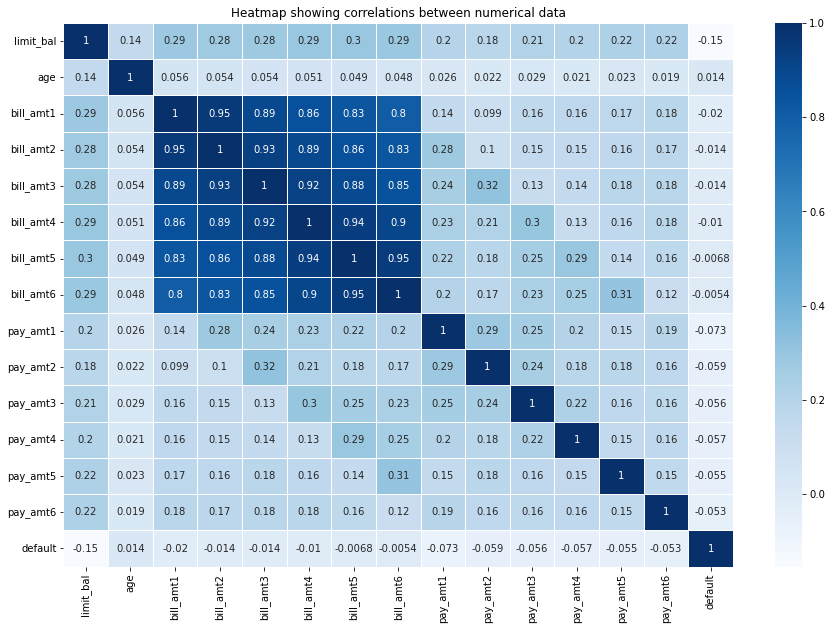

In [28]:
# this plot helps me to spot highest correlation
plt.figure(figsize=(15,10))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [29]:
# from here, we can see that bill_amt1 & bill_amt2 have the highest correlation
df.corr().unstack().sort_values(ascending = False)[20:30]

bill_amt5  bill_amt4    0.940134
bill_amt3  bill_amt2    0.928326
bill_amt2  bill_amt3    0.928326
bill_amt4  bill_amt3    0.923969
bill_amt3  bill_amt4    0.923969
bill_amt6  bill_amt4    0.900941
bill_amt4  bill_amt6    0.900941
           bill_amt2    0.892482
bill_amt2  bill_amt4    0.892482
bill_amt3  bill_amt1    0.892279
dtype: float64

In [30]:
df.head(1) # sanity check

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000,male,university,married,24,two_month_late,two_month_late,duly,duly,one_month_early,...,0,0,0,0,689,0,0,0,0,1


## Setting up the Validation Framework

In [31]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [32]:
# X_full_train = df_full_train['limit_bal'].values
# len(X_full_train)
df_test.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
10747,310000,female,secondary,married,32,unk,unk,unk,unk,unk,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12573,10000,male,secondary,married,49,duly,duly,one_month_early,duly,two_month_late,...,1690,1138,930,0,0,2828,0,182,0,1
29676,50000,female,university,married,28,duly,duly,duly,unk,duly,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8856,80000,male,secondary,married,52,two_month_late,two_month_late,three_month_late,three_month_late,three_month_late,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21098,270000,female,graduate_school,single,34,one_month_late,two_month_late,unk,unk,two_month_late,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [33]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [34]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [35]:
df_val.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,240000,male,graduate_school,married,41,duly,duly,duly,duly,duly,...,2430,7792,33196,16920,4774,2442,7829,33361,1076,0
1,90000,female,graduate_school,single,27,one_month_late,one_month_early,one_month_early,one_month_early,one_month_early,...,0,0,0,0,0,0,0,0,0,0
2,180000,female,graduate_school,single,33,unk,unk,unk,duly,duly,...,15000,14958,-42,9024,1104,15000,14958,0,0,0
3,100000,female,secondary,married,52,unk,unk,two_month_late,two_month_late,two_month_late,...,6781,6144,7638,1500,1000,1000,0,2000,2000,1
4,20000,male,graduate_school,single,23,unk,unk,three_month_late,two_month_late,two_month_late,...,19702,18395,18763,4000,1,651,0,655,653,0


In [36]:
y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

In [37]:
df_train = df_train.drop('default', axis=1)
df_val = df_val.drop('default', axis=1)
df_test = df_test.drop('default', axis=1)

In [38]:
# ROC AUC could also be used to evaluate feature importance of numerical variables.


In [39]:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

limit_bal, 0.616
      age, 0.506
bill_amt1, 0.520
bill_amt2, 0.513
bill_amt3, 0.511
bill_amt4, 0.505
bill_amt5, 0.503
bill_amt6, 0.502
 pay_amt1, 0.612
 pay_amt2, 0.603
 pay_amt3, 0.592
 pay_amt4, 0.584
 pay_amt5, 0.582
 pay_amt6, 0.583


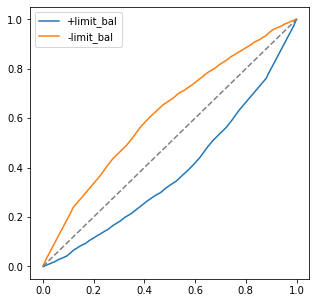

In [40]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.limit_bal)
plt.plot(fpr, tpr, label='+limit_bal')

fpr, tpr, _ = roc_curve(y_train, -df_train.limit_bal)
plt.plot(fpr, tpr, label='-limit_bal')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

see that there's separation in distribution of seniority between positive and negative classes (this is what AUC tells us about)

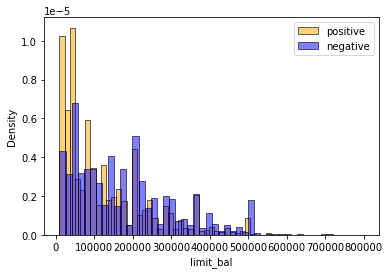

In [41]:
sns.histplot(df_train.limit_bal[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train.limit_bal[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

In [42]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [43]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [44]:
y_pred = model.predict_proba(X_val)[:, 1]

In [45]:
accuracy_score(y_val, y_pred >= 0.5).round(3)

0.78

In [46]:
dv.get_feature_names_out()

array(['age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'education=graduate_school',
       'education=others', 'education=primary', 'education=secondary',
       'education=university', 'education=unk', 'education=vocational',
       'limit_bal', 'marriage=married', 'marriage=others',
       'marriage=single', 'marriage=unk', 'pay_0', 'pay_0=duly',
       'pay_0=five_month_late', 'pay_0=four_month_late',
       'pay_0=one_month_early', 'pay_0=one_month_late',
       'pay_0=seven_month_late', 'pay_0=six_month_late',
       'pay_0=three_month_late', 'pay_0=two_month_late', 'pay_0=unk',
       'pay_2=duly', 'pay_2=five_month_late', 'pay_2=four_month_late',
       'pay_2=one_month_early', 'pay_2=one_month_late',
       'pay_2=seven_month_late', 'pay_2=six_month_late',
       'pay_2=three_month_late', 'pay_2=two_month_late', 'pay_2=unk',
       'pay_3', 'pay_3=duly', 'pay_3=five_month_late',
       'pay_3=four_month_late', 'pay_3=one_month_early',

## Using the model

In [47]:
full_train_dict = df_full_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)

X_full_train = dv.fit_transform(full_train_dict)

In [48]:
df_full_train.limit_bal.values

array([ 20000,  50000, 180000, ...,  50000,  80000, 300000], dtype=int64)

In [49]:
y_full_train = df_full_train.default.values

In [50]:
len(X_full_train)

24000

In [51]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [52]:
test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [53]:
y_pred = model.predict_proba(X_test)[:, 1]

In [54]:
default = (y_pred >= 0.5)
default

array([False, False, False, ..., False, False, False])

In [55]:
(default == y_val).mean()

0.7798333333333334

In [56]:
len(y_val)

6000

We has 78% accuracy on the test set! a little bit better than the validation set and this is really encouraging!

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
(y_val == default).mean().round(3)

0.78

In [59]:
accuracy_score(y_val, y_pred >= 0.5).round(3)

0.78

In [60]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [61]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    default = (y_pred >= t)
    score = (default == y_val).mean()
    scores.append(score)
    print('%.2f, %.3f' % (t, score))

0.00, 0.220
0.05, 0.251
0.10, 0.286
0.15, 0.345
0.20, 0.425
0.25, 0.510
0.30, 0.609
0.35, 0.709
0.40, 0.774
0.45, 0.780
0.50, 0.780
0.55, 0.780
0.60, 0.780
0.65, 0.780
0.70, 0.780
0.75, 0.780
0.80, 0.780
0.85, 0.780
0.90, 0.780
0.95, 0.780
1.00, 0.780


In [62]:
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

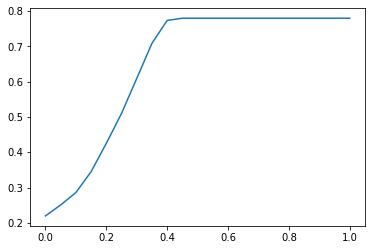

In [63]:
plt.plot(thresholds, scores)

In [64]:
Counter(y_pred >=1.0)

Counter({False: 6000})

In [65]:
1- y_val.mean() # 78% are not defaulters

0.7798333333333334

In [66]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [67]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [68]:
# tp - true positive, tn - true negative, fp - false positive, fn - false negative.
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [69]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[4679,    0],
       [1321,    0]])

In [70]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.78, 0.  ],
       [0.22, 0.  ]])

In [71]:
# r - recall
r = tp / (tp + fn)
r

0.0

In [72]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        # tp - true positive, tn - true negative, fp - false positive, fn - false negative.
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))
        
        df_scores = pd.DataFrame(scores, columns = ['threshold', 'tp', 'fp', 'fn', 'tn'])
        
        df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
        df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
        
    return df_scores

In [73]:
df_scores = tpr_fpr_dataframe(y_val, y_pred)

In [74]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [75]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr,p,r
0,0.0,1321,4679,0,0,1.000000,1.000000,0.220167,1.000000
10,0.1,1154,4116,167,563,0.873581,0.879675,0.218975,0.873581
20,0.2,878,3004,443,1675,0.664648,0.642018,0.226172,0.664648
30,0.3,385,1408,936,3271,0.291446,0.300919,0.214724,0.291446
40,0.4,6,43,1315,4636,0.004542,0.009190,0.122449,0.004542
50,0.5,0,0,1321,4679,0.000000,0.000000,NaN,0.000000
60,0.6,0,0,1321,4679,0.000000,0.000000,NaN,0.000000
70,0.7,0,0,1321,4679,0.000000,0.000000,NaN,0.000000
80,0.8,0,0,1321,4679,0.000000,0.000000,NaN,0.000000
90,0.9,0,0,1321,4679,0.000000,0.000000,NaN,0.000000


In [76]:
accuracy_score(y_val, y_pred >= 0.5).round(3)

0.78

In [77]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

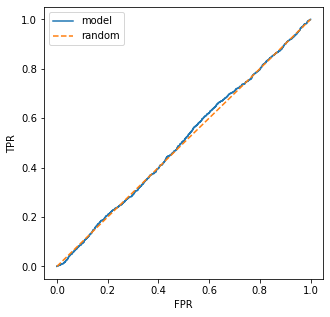

In [78]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='model')
plt.plot([0,1], [0,1], label='random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

### Predictions using the model

In [80]:
selected_user = 100
customer = test_dict[selected_user]
customer

{'sex': 'female',
 'education': 'secondary',
 'marriage': 'single',
 'pay_0': 'two_month_late',
 'pay_2': 'unk',
 'pay_3': 'unk',
 'pay_4': 'unk',
 'pay_5': 'unk',
 'pay_6': 'unk',
 'limit_bal': 100000,
 'age': 26,
 'bill_amt1': 107643,
 'bill_amt2': 109895,
 'bill_amt3': 93420,
 'bill_amt4': 73119,
 'bill_amt5': 73642,
 'bill_amt6': 71579,
 'pay_amt1': 4048,
 'pay_amt2': 3105,
 'pay_amt3': 2700,
 'pay_amt4': 2510,
 'pay_amt5': 2703,
 'pay_amt6': 2700}

In [75]:
X_one_person = dv.transform([customer])

In [76]:
X_one_person

array([[2.90000e+01, 1.82202e+05, 1.62547e+05, 1.40911e+05, 1.11881e+05,
        7.87590e+04, 7.88770e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 3.10000e+05,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

In [77]:
payment_prob = model.predict_proba(X_one_person)[0,1]
payment_prob

0.1508081989037068

In [78]:
customer_will_make_default_payment = payment_prob >= 0.5

In [79]:
if customer_will_make_default_payment == 0:
    print('Customer will NOT make the payment!')
else:
    print('Customer WILL make the payment!')

Customer will NOT make the payment!


In [80]:
y_test[0:11]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [81]:
y_test[14]

0

In [94]:
y_pred > 0.5

TypeError: only integer scalar arrays can be converted to a scalar index

In [87]:
# test for a range for users
def get_predictions(from_i, to_i):
    if(from_i > to_i):
        print('first argument must be greater then the first')
        return
    for i in range(from_i, to_i + 1):
        print("================================")
        
        customer = test_dict[selected_user]
        X_one_person = dv.transform([customer])
        
        payment_prob = model.predict_proba(X_one_person)[0,1]
        customer_will_default = payment_prob >= 0.5
        
        if customer_will_default == 0:
            print('Predicted: Customer {} will NOT default!'.format(i))
        else:
            print('Predicted: Customer {} WILL default!'.format(i))
        
        if y_test[i] == 0:
            print('The truth is: Customer {} will NOT default!'.format(i))
        else:
            print('The truth is: Customer {} WILL default!'.format(i))


In [90]:
get_predictions(40, 50)

Predicted: Customer 40 will NOT default!
The truth is: Customer 40 will NOT default!
Predicted: Customer 41 will NOT default!
The truth is: Customer 41 will NOT default!
Predicted: Customer 42 will NOT default!
The truth is: Customer 42 will NOT default!
Predicted: Customer 43 will NOT default!
The truth is: Customer 43 will NOT default!
Predicted: Customer 44 will NOT default!
The truth is: Customer 44 will NOT default!
Predicted: Customer 45 will NOT default!
The truth is: Customer 45 will NOT default!
Predicted: Customer 46 will NOT default!
The truth is: Customer 46 will NOT default!
Predicted: Customer 47 will NOT default!
The truth is: Customer 47 will NOT default!
Predicted: Customer 48 will NOT default!
The truth is: Customer 48 will NOT default!
Predicted: Customer 49 will NOT default!
The truth is: Customer 49 will NOT default!
Predicted: Customer 50 will NOT default!
The truth is: Customer 50 will NOT default!


In [84]:
roc_auc_score(y_val, y_pred)

0.5033684902294288

In [1]:
import pickle

In [87]:
output_file = 'model_C=1.0.bin'
output_file

'model_C=1.0.bin'

In [88]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

In [2]:
model_file = 'model_C=1.0.bin'

In [3]:
with open(model_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [4]:
dv, model

(DictVectorizer(sparse=False),
 LogisticRegression(max_iter=1000, solver='liblinear'))

In [5]:
customer = {'sex': 'male',
 'education': 'university',
 'marriage': 'married',
 'pay_0': 'unk',
 'pay_2': 'unk',
 'pay_3': 'unk',
 'pay_4': 'unk',
 'pay_5': 'unk',
 'pay_6': 'unk',
 'limit_bal': 310000,
 'age': 29,
 'bill_amt1': 182202,
 'bill_amt2': 162547,
 'bill_amt3': 140911,
 'bill_amt4': 111881,
 'bill_amt5': 78759,
 'bill_amt6': 78877,
 'pay_amt1': 5118,
 'pay_amt2': 3758,
 'pay_amt3': 3901,
 'pay_amt4': 2206,
 'pay_amt5': 3089,
 'pay_amt6': 3023}

In [6]:
X= dv.transform([customer])

In [7]:
model.predict_proba(X)[0,1]

0.1508081989037068